<a href="https://colab.research.google.com/github/cristinarainich/Child-Mind-Institute-Project/blob/main/Pheno_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from pathlib import Path
import pandas as pd
import numpy as np
import pylab as pl
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
sns.set()

In [4]:
working_path = Path('/content/drive/MyDrive/KKNV')

In [5]:
cd /content/drive/MyDrive/KKNV

/content/drive/MyDrive/KKNV


## File informations from different releases

In [ ]:
!ls /content/drive/MyDrive/KKNV

HBN_R10_Pheno.csv   HBN_R3_Pheno.csv  HBN_R6_Pheno.csv	HBN_R9_Pheno.csv
HBN_R1_1_Pheno.csv  HBN_R4_Pheno.csv  HBN_R7_Pheno.csv	Pheno.csv
HBN_R2_1_Pheno.csv  HBN_R5_Pheno.csv  HBN_R8_Pheno.csv	Query1.csv


In [ ]:
# info on whether there are phenotypical full files and imaging data availale
file1 = pd.read_csv(
    working_path.joinpath('HBN_R1_1_Pheno.csv'),
    index_col=None
)
file2 = pd.read_csv(
    working_path.joinpath('HBN_R2_1_Pheno.csv'),
    index_col=None
)
file3 = pd.read_csv(
    working_path.joinpath('HBN_R3_Pheno.csv'),
    index_col=None
)
file4 = pd.read_csv(
    working_path.joinpath('HBN_R4_Pheno.csv'),
    index_col=None
)
file5 = pd.read_csv(
    working_path.joinpath('HBN_R5_Pheno.csv'),
    index_col=None
)
file6 = pd.read_csv(
    working_path.joinpath('HBN_R6_Pheno.csv'),
    index_col=None
)
file7 = pd.read_csv(
    working_path.joinpath('HBN_R7_Pheno.csv'),
    index_col=None
)
file8 = pd.read_csv(
    working_path.joinpath('HBN_R8_Pheno.csv'),
    index_col=None
)
file9 = pd.read_csv(
    working_path.joinpath('HBN_R9_Pheno.csv'),
    index_col=None
)
file10 = pd.read_csv(
    working_path.joinpath('HBN_R10_Pheno.csv'),
    index_col=None
)

In [ ]:
fullpheno = pd.concat([file1, file2])
fullpheno = pd.concat([fullpheno, file3])
fullpheno = pd.concat([fullpheno, file4])
fullpheno = pd.concat([fullpheno, file5])
fullpheno = pd.concat([fullpheno, file6])
fullpheno = pd.concat([fullpheno, file7])
fullpheno = pd.concat([fullpheno, file8])
fullpheno = pd.concat([fullpheno, file9])
fullpheno = pd.concat([fullpheno, file10])

In [ ]:
fullpheno.to_csv(
    Path(working_path).joinpath('full_pheno.csv')
)

## Creating a file on MRI and full pheno information

In [6]:
# file with the identifiers that have mri imaging
fullpheno = pd.read_csv(
    working_path.joinpath('full_pheno.csv'),
    index_col=None
)

In [7]:
fullpheno.head()

,Unnamed: 0,EID,Sex,Age,EHQ_Total,Commercial_Use,Full_Pheno
0,0,NDARYM832PX3,1.0,7.048254,-33.35,No,Yes
1,1,NDARNJ687DMC,1.0,6.348163,46.67,No,Yes
2,2,NDARFM080VAF,1.0,7.623203,-100.00,No,Yes
3,3,NDARFW130NGG,1.0,8.316107,93.34,No,Yes
4,4,NDARDT800YVF,0.0,17.510381,86.67,No,Yes


In [8]:
print(fullpheno.shape)
print(len(fullpheno.EID.unique()))
# there are some identifiers that are repeated in the table

(5106, 7)
4245


In [9]:
unique = []
repetition = []
for i in fullpheno.EID.values:
  if i not in unique:
    unique.append(i)
  else:
    repetition.append(i)
print(fullpheno.shape[0])
print(len(unique))
print(len(repetition))

5106
4245
861


In [10]:
full_no_doubles = fullpheno.drop_duplicates()

In [11]:
unique = []
repetition = []
for i in full_no_doubles.EID.values:
  if i not in unique:
    unique.append(i)
  else:
    repetition.append(i)
print(full_no_doubles.shape[0])
print(len(unique))
print(len(repetition))
# still there is some repetition but let's see whether something disappears when we clean data

5105
4245
860


In [12]:
full_no_doubles.groupby(['Full_Pheno']).count()

,Unnamed: 0,EID,Sex,Age,EHQ_Total,Commercial_Use
Full_Pheno,,,,,,
No,760,760,760,760,757,760
Yes,4344,4344,4344,4344,4264,4344


In [13]:
pheno_mri = full_no_doubles[full_no_doubles['Full_Pheno'] == 'Yes']
print(pheno_mri.shape)

(4344, 7)


In [14]:
pheno_mri.groupby(['Sex']).count()
# Sex 1 - female, 0 - male

,Unnamed: 0,EID,Age,EHQ_Total,Commercial_Use,Full_Pheno
Sex,,,,,,
0.0,2797,2797,2797,2741,2797,2797
1.0,1547,1547,1547,1523,1547,1547


In [15]:
pheno_mri.groupby(['Commercial_Use']).count()

,Unnamed: 0,EID,Sex,Age,EHQ_Total,Full_Pheno
Commercial_Use,,,,,,
No,565,565,565,565,530,565
Yes,3779,3779,3779,3779,3734,3779


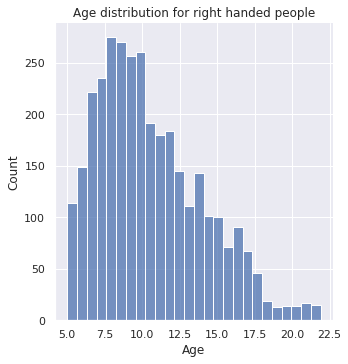

In [16]:
sns.displot(pheno_mri[pheno_mri['EHQ_Total'] >= 40].Age)
pl.title('Age distribution for right handed people');

In [17]:
unique = []
repetition = []
for i in pheno_mri[pheno_mri['EHQ_Total'] >= 40].EID.values:
  if i not in unique:
    unique.append(i)
  else:
    repetition.append(i)
print(pheno_mri[pheno_mri['EHQ_Total'] >= 40].shape[0])
print(len(unique))
print(len(repetition))
# There will be no repetition if we clean the data

3303
2684
619


In [ ]:
pheno_mri.to_csv(
    Path(working_path).joinpath('pheno_mri.csv')
)

## Pipeline to make the data convinient to use

In [8]:
# file with the identifiers that have mri imaging
pheno_mri = pd.read_csv(
    working_path.joinpath('pheno_mri.csv'),
    index_col=None
)

In [9]:
pheno_mri.drop(['Unnamed: 0'], axis=1, inplace=True)

In [10]:
pheno_mri.head()

,EID,Sex,Age,EHQ_Total,Commercial_Use,Full_Pheno
0,NDARYM832PX3,1.0,7.048254,-33.35,No,Yes
1,NDARNJ687DMC,1.0,6.348163,46.67,No,Yes
2,NDARFM080VAF,1.0,7.623203,-100.00,No,Yes
3,NDARFW130NGG,1.0,8.316107,93.34,No,Yes
4,NDARDT800YVF,0.0,17.510381,86.67,No,Yes


In [11]:
data = pd.read_csv(
    working_path.joinpath('Query1.csv'),
    index_col=None
)

In [12]:
# work on Identifiers column
ids = data.Identifiers.values
new_ids = []
for i in ids:
  new_i = i.replace(',assessment', '')
  new_ids.append(new_i)	
print(len(ids))
print(len(new_ids))

data['Identifiers'] = new_ids

8210
8210


**Crossreferencing to understand who has the full pheno**

In [13]:
print(pheno_mri.shape)
print(data.shape)

(3539, 6)
(8210, 88)


In [14]:
full_ids = pheno_mri.EID.values
data_ids = data.Identifiers.values.tolist()
hits = []
misses = []
indices = []
for i in data_ids:
  if i in full_ids:
    hits.append(i)
  elif i not in full_ids:
    misses.append(i)
    indices.append(data_ids.index(i))
print(len(hits))

3538


In [15]:
# One participant is missing from the data. It could be the case that the experiment is nor over.
for i in full_ids:
  if i not in hits:
    print(i)

NDARAL828WXM


In [16]:
pheno_mri[pheno_mri['EID'] == 'NDARAL828WXM']

,EID,Sex,Age,EHQ_Total,Commercial_Use,Full_Pheno
2601,NDARAL828WXM,0.0,15.188569,63.34,Yes,Yes


In [17]:
data_pheno = data.copy()

In [18]:
for i in indices:
  data_pheno.drop([i], axis=0, inplace=True)

In [19]:
data_pheno.shape

(3538, 88)

Here is our reduced data frame with participant who has the full phenotypic file. Let's now choose only right handed participants.

We have 72 participants with no information on their handedness. Deleting them

In [20]:
data_pheno = data_pheno[data_pheno['EHQ,EHQ_Total'] != '.']

In [21]:
data_pheno['EHQ,EHQ_Total'] = data_pheno['EHQ,EHQ_Total'].astype(float)

<ipython-input-21-ea346f66752a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pheno['EHQ,EHQ_Total'] = data_pheno['EHQ,EHQ_Total'].astype(float)


In [22]:
data_pheno = data_pheno[data_pheno['EHQ,EHQ_Total'] >= 40]

In [23]:
data_pheno.shape

(2683, 88)

In [24]:
# work on Age column
data_pheno['Basic_Demos,Age'] = data_pheno['Basic_Demos,Age'].astype(float)

In [25]:
# work on Sex column
data_pheno['Basic_Demos,Sex'] = data_pheno['Basic_Demos,Sex'].astype(int)

In [26]:
# work on Site column
data_pheno.drop(['Basic_Demos,Site'], axis=1, inplace=True)

In [27]:
data_pheno.head()

,Identifiers,"Basic_Demos,Age","Basic_Demos,Sex","CELF,CELF_Total","ConsensusDx,DX_01","ConsensusDx,DX_01_Code","ConsensusDx,DX_01_Confirmed","ConsensusDx,DX_02","ConsensusDx,DX_02_Code","ConsensusDx,DX_02_Confirmed",...,"WIAT,WIAT_Num_Stnd","WIAT,WIAT_Pseudo_Stnd","WIAT,WIAT_RC_Stnd","WIAT,WIAT_Spell_Stnd","WIAT,WIAT_Word_Stnd","WISC,WISC_FSIQ","WISC,WISC_PSI","WISC,WISC_VCI","WISC,WISC_VSI","WISC,WISC_WMI"
0,NDARAA112DMH,5.545744,0,11,ADHD-Combined Type,F90.2,NaN,NaN,NaN,NaN,...,121,NaN,NaN,87,NaN,.,.,.,.,.
1,NDARAA117NEJ,7.475929,0,11,ADHD-Combined Type,F90.2,NaN,NaN,NaN,NaN,...,99,85,89,96,85,88,77,108,84,85
2,NDARAA504CRN,9.165297,1,12,.,.,.,.,.,.,...,107,73,85,80,83,100,111,95,102,97
3,NDARAA947ZG5,13.627880,0,16,.,.,.,.,.,.,...,53,92,93,91,100,87,86,92,84,97
4,NDARAA948VFH,7.982660,1,14,ADHD-Combined Type,F90.2,NaN,Enuresis,F98.0,NaN,...,96,94,95,99,96,95,98,111,94,97


In [47]:
data_pheno[data_pheno['ConsensusDx,DX_01_Confirmed'].isna()]['ConsensusDx,DX_01'].unique()

array(['ADHD-Combined Type', 'No Diagnosis Given',
       'Autism Spectrum Disorder',
       'Other Specified Attention-Deficit/Hyperactivity Disorder',
       'ADHD-Inattentive Type', 'Specific Phobia',
       'Generalized Anxiety Disorder',
       'Specific Learning Disorder with Impairment in Mathematics',
       'Other Specified Anxiety Disorder', 'Intellectual Disability-Mild',
       'ADHD-Hyperactive/Impulsive Type', 'Bipolar I Disorder', nan,
       'Specific Learning Disorder with Impairment in Reading',
       'Obsessive-Compulsive Disorder', 'Social Anxiety (Social Phobia)',
       'Tourettes Disorder', 'Separation Anxiety',
       'Major Depressive Disorder', 'Other Specified Tic Disorder',
       'Language Disorder',
       'Specific Learning Disorder with Impairment in Written Expression',
       'Unspecified Attention-Deficit/Hyperactivity Disorder', 'Enuresis',
       'Intellectual Disability-Moderate',
       'No Diagnosis Given: Incomplete Eval',
       'Other Specifi

In [42]:
data_pheno['ConsensusDx,DX_01_Confirmed'].unique()

array([nan, '.', '1', '0'], dtype=object)

In [55]:
# work on Diagnosis column
# looks like a dot could be no diagnosis as it seems to be consistent across the columns
# there are also nan values in confirmed column
# throw away this 'No Diagnosis Given: Incomplete Eval'
# give 0 to these 'No Diagnosis Given'
def diagnosis(df, number):
  name_diag = 'ConsensusDx,DX_0' + str(number)
  name_conf = 'ConsensusDx,DX_0' + str(number) + '_Confirmed'
  diagnosis = df[name_diag].values
  confirmed = df[name_conf].values
  new_diagnosis = []
  for i in range(0, df.shape[0]):
    if diagnosis[i] == '.':
      new_diagnosis.append(0)
    elif diagnosis[i] == 'No Diagnosis Given':
      new_diagnosis.append(0)
    else:
      if confirmed[i] == '0':
        new_diagnosis.append(0)
      elif confirmed[i] == '1':
        new_diagnosis.append(diagnosis[i])
      elif confirmed[i] == '.':
        print(i)
        break
      else:
        new_diagnosis.append(diagnosis[i])
  return new_diagnosis

In [57]:
all_diagnosis = {}
for i in range(1, 10):
    all_diagnosis['diag_%s' % i] = diagnosis(data_pheno, i)
print(all_diagnosis)

{'diag_1': ['ADHD-Combined Type', 'ADHD-Combined Type', 0, 0, 'ADHD-Combined Type', 0, 0, 0, 0, 'ADHD-Inattentive Type', 'Tourettes Disorder', 0, 0, 0, 'ADHD-Combined Type', 0, 0, 0, 'Autism Spectrum Disorder', 'ADHD-Combined Type', 0, 'Other Specified Attention-Deficit/Hyperactivity Disorder', 'Autism Spectrum Disorder', 'ADHD-Inattentive Type', 0, 0, 'ADHD-Combined Type', 'ADHD-Inattentive Type', 'ADHD-Combined Type', 'Specific Learning Disorder with Impairment in Reading', 'Autism Spectrum Disorder', 0, 0, 0, 'Specific Phobia', 0, 'ADHD-Combined Type', 0, 0, 0, 0, 'ADHD-Inattentive Type', 0, 0, 'ADHD-Combined Type', 'ADHD-Inattentive Type', 0, 0, 0, 'Generalized Anxiety Disorder', 0, 0, 0, 0, 0, 'Autism Spectrum Disorder', 0, 0, 'Specific Learning Disorder with Impairment in Mathematics', 'ADHD-Combined Type', 'ADHD-Inattentive Type', 0, 0, 'Autism Spectrum Disorder', 0, 0, 0, 0, 'Other Specified Anxiety Disorder', 0, 'Autism Spectrum Disorder', 'Intellectual Disability-Mild', 0, 0,

In [66]:
all_in_one = []
for i in range(0, data_pheno.shape[0]):
  kk = []
  for sublist in all_diagnosis:
    kk.append(all_diagnosis[sublist][i])
  all_in_one.append(kk)

In [68]:
data_pheno['Diagnosis'] = all_in_one

In [ ]:
# work on Site column
data_pheno.drop(['Basic_Demos,Site'], axis=1, inplace=True)

In [70]:
for i in range(1,10):
  name_diag = 'ConsensusDx,DX_0' + str(i)
  name_conf = 'ConsensusDx,DX_0' + str(i) + '_Confirmed'
  name_code = 'ConsensusDx,DX_0' + str(i) + '_Code'
  data_pheno.drop([name_diag], axis=1, inplace=True)
  data_pheno.drop([name_conf], axis=1, inplace=True)
  data_pheno.drop([name_code], axis=1, inplace=True)
data_pheno.drop(['ConsensusDx,DX_10'], axis=1, inplace=True)
data_pheno.drop(['ConsensusDx,DX_10_Code'], axis=1, inplace=True)
data_pheno.drop(['ConsensusDx,DX_10_Confirmed'], axis=1, inplace=True)

In [74]:
data_pheno.head()

,Identifiers,"Basic_Demos,Age","Basic_Demos,Sex","CELF,CELF_Total","DailyMeds,med_dose_01","DailyMeds,med_dose_02","DailyMeds,med_dose_03","DailyMeds,med_name_01","DailyMeds,med_name_02","DailyMeds,med_name_03",...,"WIAT,WIAT_Pseudo_Stnd","WIAT,WIAT_RC_Stnd","WIAT,WIAT_Spell_Stnd","WIAT,WIAT_Word_Stnd","WISC,WISC_FSIQ","WISC,WISC_PSI","WISC,WISC_VCI","WISC,WISC_VSI","WISC,WISC_WMI",Diagnosis
0,NDARAA112DMH,5.545744,0,11,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,87,NaN,.,.,.,.,.,"[ADHD-Combined Type, nan, nan, nan, nan, nan, ..."
1,NDARAA117NEJ,7.475929,0,11,40mg- 1 puff,NaN,NaN,Qvar,NaN,NaN,...,85,89,96,85,88,77,108,84,85,"[ADHD-Combined Type, nan, nan, nan, nan, nan, ..."
2,NDARAA504CRN,9.165297,1,12,.,.,.,.,.,.,...,73,85,80,83,100,111,95,102,97,"[0, 0, 0, 0, 0, 0, 0, 0, 0]"
3,NDARAA947ZG5,13.627880,0,16,.,.,.,.,.,.,...,92,93,91,100,87,86,92,84,97,"[0, 0, 0, 0, 0, 0, 0, 0, 0]"
4,NDARAA948VFH,7.982660,1,14,.,.,.,.,.,.,...,94,95,99,96,95,98,111,94,97,"[ADHD-Combined Type, Enuresis, nan, nan, nan, ..."


In [ ]:
diag1 = data['ConsensusDx,DX_01'].values
conf1 = data['ConsensusDx,DX_01'].values

Only 333 out of 852 have the full phenotypical file. All of them signed up for commercial use.


In [ ]:
age = full_right.Age.values
up_to_7 = []
in_between = []
after_10 = []
for i in range(0, len(age)):
  if age[i] < 7:
    up_to_7.append(age[i])
  elif 7 <= age[i] <= 10:
    in_between.append(age[i])
  elif age[i] > 10:
    after_10.append(age[i])

In [ ]:
print(len(up_to_7))
print(len(in_between))
print(len(after_10))

40
113
109


In [ ]:
data.columns

Index(['Identifiers', 'Basic_Demos,Age', 'Basic_Demos,Sex', 'Basic_Demos,Site',
       'CELF,CELF_Total', 'ConsensusDx,DX_01', 'ConsensusDx,DX_01_Code',
       'ConsensusDx,DX_01_Confirmed', 'ConsensusDx,DX_02',
       'ConsensusDx,DX_02_Code', 'ConsensusDx,DX_02_Confirmed',
       'ConsensusDx,DX_03', 'ConsensusDx,DX_03_Code',
       'ConsensusDx,DX_03_Confirmed', 'ConsensusDx,DX_04',
       'ConsensusDx,DX_04_Code', 'ConsensusDx,DX_04_Confirmed',
       'ConsensusDx,DX_05', 'ConsensusDx,DX_05_Code',
       'ConsensusDx,DX_05_Confirmed', 'ConsensusDx,DX_06',
       'ConsensusDx,DX_06_Code', 'ConsensusDx,DX_06_Confirmed',
       'ConsensusDx,DX_07', 'ConsensusDx,DX_07_Code',
       'ConsensusDx,DX_07_Confirmed', 'ConsensusDx,DX_08',
       'ConsensusDx,DX_08_Code', 'ConsensusDx,DX_08_Confirmed',
       'ConsensusDx,DX_09', 'ConsensusDx,DX_09_Code',
       'ConsensusDx,DX_09_Confirmed', 'ConsensusDx,DX_10',
       'ConsensusDx,DX_10_Code', 'ConsensusDx,DX_10_Confirmed',
       'DailyMed

In [ ]:
data.shape

(8210, 88)

In [ ]:
subset = data[[
    'Basic_Demos,Age', 'Basic_Demos,Sex',
    'EHQ,EHQ_Total', 'DailyMeds,med_dose_01', 'DailyMeds,med_dose_02',
       'DailyMeds,med_dose_03', 'DailyMeds,med_name_01',
       'DailyMeds,med_name_02', 'DailyMeds,med_name_03',
       'ConsensusDx,DX_01', 'ConsensusDx,DX_01_Code',
       'ConsensusDx,DX_01_Confirmed', 'ConsensusDx,DX_02',
       'ConsensusDx,DX_02_Code', 'ConsensusDx,DX_02_Confirmed',
       'ConsensusDx,DX_03', 'ConsensusDx,DX_03_Code',
       'ConsensusDx,DX_03_Confirmed', 'ConsensusDx,DX_04',
       'ConsensusDx,DX_04_Code', 'ConsensusDx,DX_04_Confirmed',
       'ConsensusDx,DX_05', 'ConsensusDx,DX_05_Code',
       'ConsensusDx,DX_05_Confirmed', 'ConsensusDx,DX_06',
       'ConsensusDx,DX_06_Code', 'ConsensusDx,DX_06_Confirmed',
       'ConsensusDx,DX_07', 'ConsensusDx,DX_07_Code',
       'ConsensusDx,DX_07_Confirmed', 'ConsensusDx,DX_08',
       'ConsensusDx,DX_08_Code', 'ConsensusDx,DX_08_Confirmed',
       'ConsensusDx,DX_09', 'ConsensusDx,DX_09_Code',
       'ConsensusDx,DX_09_Confirmed'
]]

In [ ]:
subset.head()

,"Basic_Demos,Age","Basic_Demos,Sex","EHQ,EHQ_Total","DailyMeds,med_dose_01","DailyMeds,med_dose_02","DailyMeds,med_dose_03","DailyMeds,med_name_01","DailyMeds,med_name_02","DailyMeds,med_name_03","ConsensusDx,DX_01",...,"ConsensusDx,DX_07_Confirmed","ConsensusDx,DX_08","ConsensusDx,DX_08_Code","ConsensusDx,DX_08_Confirmed","ConsensusDx,DX_09","ConsensusDx,DX_09_Code","ConsensusDx,DX_09_Confirmed","ConsensusDx,DX_10","ConsensusDx,DX_10_Code","ConsensusDx,DX_10_Confirmed"
0,5.545744,0,40,NaN,NaN,NaN,NaN,NaN,NaN,ADHD-Combined Type,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7.475929,0,62.2,40mg- 1 puff,NaN,NaN,Qvar,NaN,NaN,ADHD-Combined Type,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9.165297,1,73.34,.,.,.,.,.,.,.,...,.,.,.,.,.,.,.,.,.,.
3,13.62788,0,80,.,.,.,.,.,.,.,...,.,.,.,.,.,.,.,.,.,.
4,7.98266,1,90,.,.,.,.,.,.,ADHD-Combined Type,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
subset['EHQ,EHQ_Total'].values[0]

'40'

In [ ]:
# create a code that will identify all the drugs here
print(subset['DailyMeds,med_name_01'].unique())
print(subset['DailyMeds,med_name_02'].unique())
print(subset['DailyMeds,med_name_03'].unique())

[nan 'Qvar' '.' 'Zoloft' 'Depakote' 'Methylphenidate' 'Focalin'
 'amoxicillian' 'Abilify' 'vyvanse' 'Strattera' 'Concerta' 'abilify'
 'Budesonide' 'Prozac' 'diphacalydramine' 'Folcaline XR' 'conerta'
 'Dramamine' 'Detrol LA' 'Claritin' 'Celexa' 'Focalin XR' 'Tenex'
 'concerta' 'Ibuprofen ' 'Guanfacine' 'Singular' 'Antiobiotic' 'Symbacort'
 'Singulair' 'Topomax' 'Robitussin' 'Albuterol' 'Fluoxetine (Prozac)'
 'Zyrtec' 'Allegra' 'Vyvanse' 'Vitamin D Drops' 'dimetapp' 'Zyrtec '
 'prozac' 'Iron' 'Benadryl ' 'Gildess' 'Zyrteck' 'Fluoxetine' 'Respadone'
 'Antacid (Pepcid)' 'Trileptal' 'cefdinir' 'Zyrtek' 'Zyrte C' 'Quillivant'
 'Antibiotic' 'Oneaday vitamin' 'Tylenol' 'Risperidone'
 'Stimulant (Update later once parent remembers' 'risperidone'
 'Prednisone' 'Wellbutrinxz' 'Amoxicillin' 'Straterra'
 'Birth Control (GILDES)' 'Intuniv' 'Focelin' 'Effexor' 'strattera'
 'Strattera ' 'amoxil' 'Methyl B12' 'quillavant' 'Vyvance' 'adderall'
 'Flovent' 'Amphetamine Salt ER' 'Benadryl' 'Strattera (las

In [ ]:
# create a code that will identify all the drugs here
print(subset['ConsensusDx,DX_02'].unique())
#print(subset['ConsensusDx,DX_01_Code'].unique())
#print(subset['ConsensusDx,DX_01_Confirmed'].unique())

[nan '.' 'Enuresis' 'ADHD-Combined Type'
 'Other Specified Feeding or Eating Disorder' 'Separation Anxiety'
 'Autism Spectrum Disorder'
 'Specific Learning Disorder with Impairment in Reading'
 'Social Anxiety (Social Phobia)' 'Developmental Coordination Disorder'
 'Generalized Anxiety Disorder' 'Acute Stress Disorder'
 'Intellectual Disability-Mild' 'Language Disorder'
 'Major Depressive Disorder' 'ADHD-Inattentive Type'
 'Other Specified Insomnia Disorder'
 'Other Specified Trauma- and Stressor-Related Disorder' 'Encopresis'
 'Hoarding Disorder' 'Other Specified Depressive Disorder'
 'Tourettes Disorder' 'Agoraphobia' 'Adjustment Disorders'
 'Specific Phobia' 'Other Specified Anxiety Disorder'
 'Obsessive-Compulsive Disorder' 'Disruptive Mood Dysregulation Disorder'
 'Other Specified Attention-Deficit/Hyperactivity Disorder'
 'Specific Learning Disorder with Impairment in Mathematics'
 'Speech Sound Disorder' 'Excoriation (Skin-Picking) Disorder'
 'Unspecified Intellectual Disability

In [ ]:
print(subset['ConsensusDx,DX_01'].unique())
print(subset['ConsensusDx,DX_02'].unique())
print(subset['ConsensusDx,DX_03'].unique())
print(subset['ConsensusDx,DX_04'].unique())
print(subset['ConsensusDx,DX_05'].unique())
print(subset['ConsensusDx,DX_06'].unique())
print(subset['ConsensusDx,DX_07'].unique())
print(subset['ConsensusDx,DX_08'].unique())
print(subset['ConsensusDx,DX_09'].unique())

['ADHD-Combined Type' '.' 'Disruptive Mood Dysregulation Disorder'
 'ADHD-Inattentive Type' 'Tourettes Disorder' 'No Diagnosis Given'
 'Autism Spectrum Disorder'
 'Other Specified Attention-Deficit/Hyperactivity Disorder'
 'Specific Learning Disorder with Impairment in Reading'
 'No Diagnosis Given: Incomplete Eval' 'Specific Phobia'
 'ADHD-Hyperactive/Impulsive Type' 'Generalized Anxiety Disorder'
 'Specific Learning Disorder with Impairment in Mathematics'
 'Other Specified Anxiety Disorder' 'Intellectual Disability-Mild'
 'Bipolar I Disorder' nan 'Obsessive-Compulsive Disorder'
 'Other Specified Depressive Disorder'
 'Unspecified Attention-Deficit/Hyperactivity Disorder'
 'Social Anxiety (Social Phobia)' 'Separation Anxiety'
 'Major Depressive Disorder' 'Persistent Depressive Disorder (Dysthymia)'
 'Other Specified Tic Disorder' 'Language Disorder'
 'Specific Learning Disorder with Impairment in Written Expression'
 'Enuresis' 'Major Neurocognitive Disorder Due to Epilepsy' 'Encopre